In [1]:
from matplotlib import rc
import seaborn as sns
import matplotlib.pyplot as plt
####################################################################
# Notebook configuration
plt.close('all')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
# text.usetex is set as False by default to avoid problems with student computers
params = {'axes.labelsize': 12,
          'font.size': 16,
          'legend.fontsize': 16,
          'text.usetex': False,
          'figure.figsize': (20, 10)}
plt.rcParams.update(params)

sns.set_context("poster")
sns.set_palette("colorblind")
sns.set_style("white")
sns.axes_style()
%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


# 1 Régularisation de Tikhonov

## Question 1.1

### Gradient

Pour $\left(\omega_{0},\omega\right)\in\mathbb{R}\times\mathbb{R}^{p}$
 , on a :

\begin{array}{lll}
f(\omega_{0},\omega) & = & \dfrac{1}{n}{\displaystyle \sum_{i=1}^{n}}\ln\left(1+\exp\left(-y_{i}\left(x_{i}^{T}\omega+\omega_{0}\right)\right)\right)+\dfrac{\rho}{2}\left\Vert \omega\right\Vert _{2}^{2}\\
 & = & \dfrac{1}{n}{\displaystyle \sum_{i=1}^{n}}\ln\left(1+\exp\left(h\left(\omega_{0},\omega\right)\right)\right)+\dfrac{\rho}{2}\left\Vert \omega\right\Vert _{2}^{2}\\
 & = & \dfrac{1}{n}{\displaystyle \sum_{i=1}^{n}}\ln\left(g\left(\omega_{0},\omega\right)\right)+\dfrac{\rho}{2}\left\Vert \omega\right\Vert _{2}^{2}
\end{array}
 

Donc :\begin{array}{lll}
\dfrac{\partial f(\omega_{0},\omega)}{\partial\omega_{0}} & = & \dfrac{1}{n}{\displaystyle \sum_{i=1}^{n}}\dfrac{\frac{\partial g\left(\omega_{0},\omega\right)}{\partial\omega_{0}}}{g(\omega_{0},\omega)}\\
 & = & \dfrac{1}{n}{\displaystyle \sum_{i=1}^{n}}\dfrac{\frac{\partial h\left(\omega_{0},\omega\right)}{\partial\omega_{0}}\exp\left(h\left(\omega_{0},\omega\right)\right)}{g(\omega_{0},\omega)}\\
 & = & \dfrac{1}{n}{\displaystyle \sum_{i=1}^{n}}\dfrac{-y_{i}\exp\left(-y_{i}\left(x_{i}^{T}\omega+\omega_{0}\right)\right)}{1+\exp\left(-y_{i}\left(x_{i}^{T}\omega+\omega_{0}\right)\right)}\\
 & = & -\dfrac{1}{n}{\displaystyle \sum_{i=1}^{n}}\dfrac{y_{i}}{1+\exp\left(y_{i}\left(x_{i}^{T}\omega+\omega_{0}\right)\right)}
\end{array}
 

et

\begin{array}{lll}
\dfrac{\partial f(\omega_{0},\omega)}{\partial\omega} & = & \dfrac{1}{n}{\displaystyle \sum_{i=1}^{n}}\dfrac{\frac{\partial g\left(\omega_{0},\omega\right)}{\partial\omega}}{g(\omega_{0},\omega)}+\rho\omega\\
 & = & \dfrac{1}{n}{\displaystyle \sum_{i=1}^{n}}\dfrac{\frac{\partial h\left(\omega_{0},\omega\right)}{\partial\omega}\exp\left(h\left(\omega_{0},\omega\right)\right)}{g(\omega_{0},\omega)}+\rho\omega\\
 & = & \dfrac{1}{n}{\displaystyle \sum_{i=1}^{n}}\dfrac{-y_{i}\exp\left(-y_{i}\left(x_{i}^{T}\omega+\omega_{0}\right)\right)}{1+\exp\left(-y_{i}\left(x_{i}^{T}\omega+\omega_{0}\right)\right)}x_{i}+\rho\omega\\
 & = & \dfrac{1}{n}{\displaystyle \sum_{i=1}^{n}}\dfrac{-y_{i}}{1+\exp\left(y_{i}\left(x_{i}^{T}\omega+\omega_{0}\right)\right)}x_{i}+\rho\omega
\end{array}
 

D'où

$$\nabla f\left(\omega_{0},\omega\right)=\left(\dfrac{1}{n}{\displaystyle \sum_{i=1}^{n}}\dfrac{-y_{i}}{1+\exp\left(y_{i}\left(x_{i}^{T}\omega+\omega_{0}\right)\right)}\left(\begin{array}{c}
1\\
x_{i}
\end{array}\right)+\rho\left(\begin{array}{c}
0\\
\omega
\end{array}\right)\right)
 $$
 

### Hessienne

Pour $\left(\omega_{0},\omega\right)\in\mathbb{R}\times\mathbb{R}^{p}$
 , on a :

\begin{array}{lll}
\dfrac{\partial^{2}f(\omega_{0},\omega)}{\partial\omega_{0}^{2}} & = & \dfrac{\partial}{\partial\omega_{0}}\left(-\dfrac{1}{n}{\displaystyle \sum_{i=1}^{n}}\dfrac{y_{i}}{1+\exp\left(y_{i}\left(x_{i}^{T}\omega+\omega_{0}\right)\right)}\right)\\
 & = & -\dfrac{1}{n}{\displaystyle \sum_{i=1}^{n}}\dfrac{y_{i}\left(-y_{i}\exp\left(y_{i}\left(x_{i}^{T}\omega+\omega_{0}\right)\right)\right)}{\left(1+\exp\left(y_{i}\left(x_{i}^{T}\omega+\omega_{0}\right)\right)\right)^{2}}\\
 & = & \dfrac{1}{n}{\displaystyle \sum_{i=1}^{n}}\dfrac{y_{i}^{2}\exp\left(y_{i}\left(x_{i}^{T}\omega+\omega_{0}\right)\right)}{\left(\frac{2\cosh\left(\frac{y_{i}}{2}\left(x_{i}^{T}\omega+\omega_{0}\right)\right)}{\exp\left(-\frac{y_{i}}{2}\left(x_{i}^{T}\omega+\omega_{0}\right)\right)}\right)^{2}}\\
 & = & \dfrac{1}{n}{\displaystyle \sum_{i=1}^{n}}\dfrac{y_{i}^{2}}{\left(2\cosh\left(\frac{y_{i}}{2}\left(x_{i}^{T}\omega+\omega_{0}\right)\right)\right)^{2}}
\end{array}
 

\begin{array}{lll}
\dfrac{\partial^{2}f(\omega_{0},\omega)}{\partial\omega^{2}} & = & \dfrac{\partial}{\partial\omega}\left(-\dfrac{1}{n}{\displaystyle \sum_{i=1}^{n}}\dfrac{y_{i}}{1+\exp\left(y_{i}\left(x_{i}^{T}\omega+\omega_{0}\right)\right)}x_{i}+\rho\omega\right)\\
 & = & -\dfrac{1}{n}{\displaystyle \sum_{i=1}^{n}}\dfrac{y_{i}\left(-y_{i}\exp\left(y_{i}\left(x_{i}^{T}\omega+\omega_{0}\right)\right)x_{i}\right)x_{i}^{T}}{\left(1+\exp\left(y_{i}\left(x_{i}^{T}\omega+\omega_{0}\right)\right)\right)^{2}}\\
 & = & \dfrac{1}{n}{\displaystyle \sum_{i=1}^{n}}\dfrac{y_{i}^{2}x_{i}x_{i}^{T}}{\left(2\cosh\left(\frac{y_{i}}{2}\left(x_{i}^{T}\omega+\omega_{0}\right)\right)\right)^{2}}+\rho I_{p}
\end{array}
 

\begin{array}{lll}
\dfrac{\partial^{2}f(\omega_{0},\omega)}{\partial\omega\partial\omega_{0}} & = & \dfrac{\partial}{\partial\omega}\left(-\dfrac{1}{n}{\displaystyle \sum_{i=1}^{n}}\dfrac{y_{i}}{1+\exp\left(y_{i}\left(x_{i}^{T}\omega+\omega_{0}\right)\right)}\right)\\
 & = & -\dfrac{1}{n}{\displaystyle \sum_{i=1}^{n}}\dfrac{y_{i}\left(-y_{i}\exp\left(y_{i}\left(x_{i}^{T}\omega+\omega_{0}\right)\right)x_{i}\right)}{\left(1+\exp\left(y_{i}\left(x_{i}^{T}\omega+\omega_{0}\right)\right)\right)^{2}}\\
 & = & \dfrac{1}{n}{\displaystyle \sum_{i=1}^{n}}\dfrac{y_{i}^{2}x_{i}}{\left(2\cosh\left(\frac{y_{i}}{2}\left(x_{i}^{T}\omega+\omega_{0}\right)\right)\right)^{2}}
\end{array}
 

\begin{array}{lll}
\dfrac{\partial^{2}f(\omega_{0},\omega)}{\partial\omega_{0}\partial\omega} & = & \dfrac{\partial}{\partial\omega_{0}}\left(-\dfrac{1}{n}{\displaystyle \sum_{i=1}^{n}}\dfrac{y_{i}}{1+\exp\left(y_{i}\left(x_{i}^{T}\omega+\omega_{0}\right)\right)}x_{i}+\rho\omega\right)\\
 & = & -\dfrac{1}{n}{\displaystyle \sum_{i=1}^{n}}\dfrac{y_{i}\left(-y_{i}\exp\left(y_{i}\left(x_{i}^{T}\omega+\omega_{0}\right)\right)\right)}{\left(1+\exp\left(y_{i}\left(x_{i}^{T}\omega+\omega_{0}\right)\right)\right)^{2}}x_{i}^{T}\\
 & = & -\dfrac{1}{n}{\displaystyle \sum_{i=1}^{n}}\dfrac{y_{i}^{2}x_{i}^{T}}{\left(2\cosh\left(\frac{y_{i}}{2}\left(x_{i}^{T}\omega+\omega_{0}\right)\right)\right)^{2}}
\end{array}
 

Par suite

$$H\left(f\left(\omega_{0},\omega\right)\right)=\dfrac{1}{n}{\displaystyle \sum_{i=1}^{n}}\dfrac{y_{i}^{2}}{\left(2\cosh\left(\frac{y_{i}}{2}\left(x_{i}^{T}\omega+\omega_{0}\right)\right)\right)^{2}}\left[\begin{array}{c}
1\\
x_{i}
\end{array}\right]\left[\begin{array}{cc}
1 & x_{i}\end{array}\right]+\left[\begin{array}{cc}
0 & 0\\
0 & \rho I_{p}
\end{array}\right]$$
 

### Convexité

Posons, pour $i\in\{1,..,p\}$ :
$$
\begin{array}{ccc}
a_{i} & = & \dfrac{y_{i}^{2}}{\left(2\cosh\left(\frac{y_{i}}{2}\left(x_{i}^{T}\omega+\omega_{0}\right)\right)\right)^{2}}\\
v_{i} & = & \left(\begin{array}{c}
1\\
x_{i}
\end{array}\right)
\end{array}
$$
Pour $u\in\mathbb{R}^{p+1},u\neq0$, on a:

\begin{cases}
\begin{array}{lcll}
u^{t}Hu & = & u^{t}\times\rho\left[\begin{array}{cc}
0 & 0\\
0 & I_{p}
\end{array}\right]\times u+{\displaystyle \sum_{i=1}^{n}\left(u^{t}a_{i}v_{i}\right)\left(v_{i}^{t}a_{i}^{t}u\right)}\\
u^{t}\times\rho\left[\begin{array}{cc}
0 & 0\\
0 & I_{p}
\end{array}\right]\times u & = & \rho{\displaystyle \sum_{i=1}^{n}}u^{t}u & >0\\
\sum_{i=1}^{n}\left(u^{t}a_{i}v_{i}\right)\left(v_{i}^{t}a_{i}^{t}u\right) & = & {\displaystyle \sum_{i=1}^{n}}\left(u^{t}a_{i}v_{i}\right)^{2} & >0
\end{array}\end{cases}

Donc H est symétrique définie positive.

Par suite, $f_{1}$ est convexe.

## Question 1.2

### Test de l'algorithme

In [2]:
from cervicalcancerutils import load_cervical_cancer
import numpy as np
import scipy as sp
import math
X = np.eye(3)
n,p = X.shape
X = np.column_stack((np.ones(X.shape[0]),X))
rho = 1./n
w = np.matrix((0,1,2,3))
y = np.array((1,-1,1))
tikhonov = float(sum(np.log(1+np.exp(-y[i]*(np.matrix(X[i,:])).dot(w.T))) for i in range(y.shape[0])))/n + rho/2. * np.linalg.norm(w)**2
print(tikhonov)
gradient = np.ravel(1./n * sum(-y[i]/(1+np.exp(y[i]*(np.matrix(X[i,:])).dot(w.T)))*X[i,:].T for i in range(y.shape[0])) + rho * w)
print(gradient)
hessienne = 1./n * sum (float(y[i]**2/(2*np.cosh(y[i]/2*(np.matrix(X[i,:])).dot(w.T)))**2) * (np.matrix(X[i,:]).T*np.matrix(X[i,:])) for i in range(y.shape[0]))+rho * np.eye(X.shape[1])
hessienne[0,0]-=rho
print(hessienne)

3.16292568338
[ 0.18814326  0.24368619  0.96026569  0.98419138]
[[ 0.17255424  0.08333333  0.00588757  0.08333333]
 [ 0.08333333  0.41666667  0.          0.        ]
 [ 0.00588757  0.          0.3392209   0.        ]
 [ 0.08333333  0.          0.          0.41666667]]


### Exécution sur le jeu de test réel

In [3]:
from scipy.optimize import check_grad
X,y = load_cervical_cancer("riskfactorscervicalcancer.csv")
n,p = X.shape
X = np.column_stack((np.ones(X.shape[0]),X))
rho = 1./n
def f(w):
    return float(sum(np.log(1+np.exp(-y[i]*(np.matrix(X[i,:])).dot(w.T))) for i in range(y.shape[0])))/n + rho/2. * np.linalg.norm(w)**2
def grad(w):
    return np.ravel(1./n * sum(-y[i]/(1+np.exp(y[i]*(np.matrix(X[i,:])).dot(w.T)))*X[i,:].T for i in range(y.shape[0])) + rho * w)
def hess(w):
    hessienne = 1./n * sum (float(y[i]**2/(2*np.cosh(y[i]/2*(np.matrix(X[i,:])).dot(w.T)))**2) * (np.matrix(X[i,:]).T*np.matrix(X[i,:])) for i in range(y.shape[0]))+rho * np.eye(X.shape[1])
    hessienne[0,0]-=rho
    return hessienne

In [4]:
w_init=np.ones(X.shape[1])
print(check_grad(f,grad,w_init))

2.82127802014e-07


## Question 1.3

In [5]:
def newton(epsilon,w = np.zeros(p+1)):
    norms=[]
    while(np.linalg.norm(grad(w))>=epsilon):
        try:
            w = w - np.linalg.inv(hess(w)).dot(grad(w))
            norms.append(np.linalg.norm(grad(np.array(w))))
        except:
            break
    return w, norms

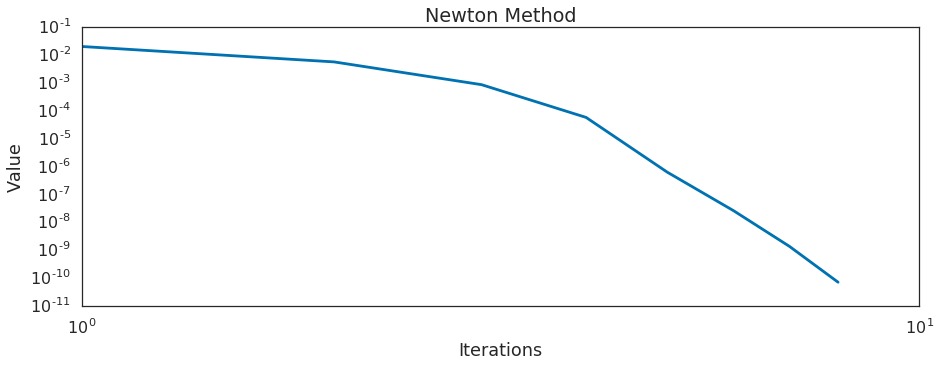

In [6]:
####################################################################
# Plot the dataset
plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))
plt.title('Newton Method')
plt.loglog(newton(1e-10)[1])
plt.xlabel("Iterations")
plt.ylabel("Value")
plt.show()

## Question 1.4

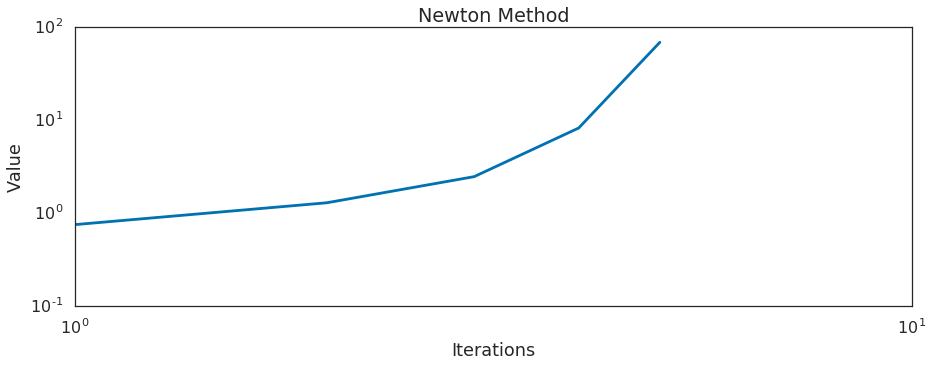

In [7]:
plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))
plt.title('Newton Method')
plt.loglog(newton(1e-10, 0.3*np.ones(p+1))[1])
plt.xlabel("Iterations")
plt.ylabel("Value")
plt.show()

Nous remarquons que la méthode diverge

## Question 1.5

In [8]:
def newton_linear_search(f, grad, hess, init, epsilon):
    w = init
    val = f(w)
    g = grad(w)
    h = hess(w)
    norm_grad = [np.linalg.norm(g)]
    while (np.linalg.norm(g) >= epsilon):
        d = np.dot(np.linalg.inv(h), g) # initialiser la directon de descente
        gamma = 1. # le pas gamma = b * a^l 
        alpha = .5  #joue le rôle de a
        beta = 1e-4 # joue le rôle de beta
        # trouver le pas optimal en trouvant le plus petit entier vérifiant l'inégalité
        while (f(w-gamma*d) > val - beta * gamma * np.dot(g, np.matrix(d).T)):
            gamma = alpha*gamma # gamma = ba^(l+1)
        w = w - gamma * d #mettre à jour le nouveau w
        val = f(w)
        g=grad(w)
        h=hess(w)
        norm_grad = np.concatenate((norm_grad, [np.linalg.norm(g)]))
    return val,w,norm_grad

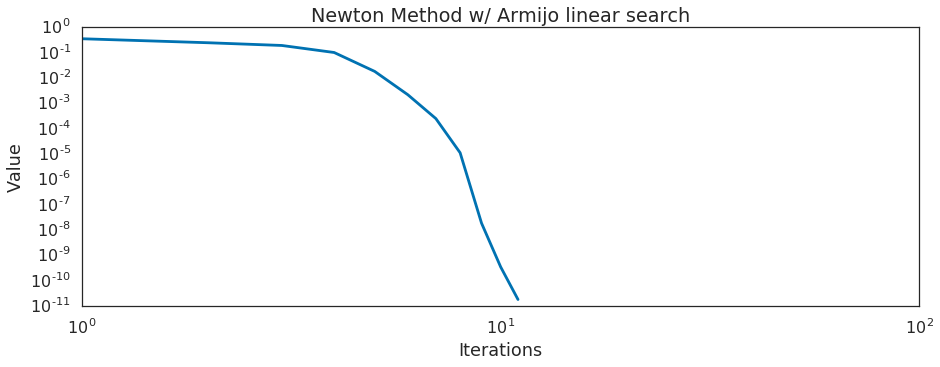

In [9]:
init = (0.3*np.ones(p+1))
plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))
plt.title('Newton Method w/ Armijo linear search')
plt.loglog(newton_linear_search(f, grad, hess, init, 1e-10)[2])
plt.xlabel("Iterations")
plt.ylabel("Value")
plt.show()

# 2. Régularisation pour la parcimonie

## Question 2.1

Nous remarquons que $\omega\mapsto\rho\left\Vert \omega\right\Vert _{1}$ n'est pas de classe $\mathscr{C}^{1}$ sur $\mathbb{R}^{p}$. Elle n'est donc pas de classe $\mathscr{C}^{2}$ sur $\mathbb{R}^{p}$.

Par suite, $F_{2}$ n'est pas de classe $\mathscr{C}^{2}$ sur $\mathbb{R\times}\mathbb{R}^{p}$.

La méthode n'est donc pas utilisable.

## Question 2.2

### Définition des fonctions

Nous posons
$$
\begin{array}{lcl}
f_{2}:\left(\omega_{0},\omega\right) & \mapsto & \dfrac{1}{n}{\displaystyle \sum_{i=1}^{n}\ln\left(1+\exp\left(-y_{i}\left(x_{i}^{T}\omega+\omega_{0}\right)\right)\right)}\\
g_{2}:\left(\omega_{0},\omega\right) & \mapsto & \rho\left\Vert \omega\right\Vert _{1}
\end{array}
$$

### Opérateur proximal de $g_2$

On a
$$
\textrm{prox}_{g_{2}}:\left(\omega_{0},\omega\right)\mapsto\left(\begin{array}{l}
\textrm{prox}_{g_{20}}\left(\omega_{0},\omega\right)\\
\textrm{prox}_{g_{21}}\left(\omega_{0},\omega\right)\\
...\\
\textrm{prox}_{g_{2n}}\left(\omega_{0},\omega\right)
\end{array}\right)
$$
avec

$$
\omega=\left(\begin{array}{l}
\omega_{1}\\
...\\
\omega_{n}
\end{array}\right)
$$

et, pour $ i\in\{0,..,p\}$ :
$$   
\textrm{prox}_{g_{2i}}:\left(\omega_{0},\omega\right)\mapsto\begin{cases}
\omega_{i}-\rho & \omega_{i}\geq\rho\\
0 & \left|\omega_{i}\right|<\rho\\
\omega_{i}+\rho & \omega_{i}\leq-\rho
\end{cases}
$$

### Gradient de $f_2$

Pour $\left(\omega_{0},\omega\right)\in\mathbb{R}\times\mathbb{R}^{p}$
$$\nabla f_{2}\left(\omega_{0},\omega\right)=\dfrac{1}{n}{\displaystyle \sum_{i=1}^{n}}\dfrac{-y_{i}}{1+\exp\left(y_{i}\left(x_{i}^{T}\omega+\omega_{0}\right)\right)}\left(\begin{array}{c}
1\\
x_{i}
\end{array}\right)
 $$

### Convexité

D'après la question 1.1, $f_2$ est convexe. De plus, la norme 1 est également convexe.
Par suite $F_2$ est convexe car somme de deux fonctions convexes.

### Question 2.3

In [14]:
def f2(w):
    return float(sum(np.log(1+np.exp(-y[i]*(np.matrix(X[i,:])).dot(w.T))) for i in range(y.shape[0])))/n
def grad2(w):
    return np.ravel(1./n * sum(-y[i]/(1+np.exp(y[i]*(np.matrix(X[i,:])).dot(w.T)))*X[i,:].T for i in range(y.shape[0])))
def hess2(w):
    return 1./n * sum (float(y[i]**2/(2*np.cosh(y[i]/2*(np.matrix(X[i,:])).dot(w.T)))**2) * (np.matrix(X[i,:]).T*np.matrix(X[i,:])) for i in range(y.shape[0]))
rho = 0.1
def g2(w):
    return rho * np.linalg.norm(w,ord=1)
def prox(w):
    pr= np.zeros(p+1)
    pos_index = w > rho
    neg_index = w < -rho
    pr[pos_index] = w[pos_index] - rho
    pr[neg_index] = w[neg_index] + rho
    pr[0]=0.0
    return pr
def F2(w):
    return f2(w) + g2(w)

In [11]:
def proximal_linear_search(f, grad, prox, init, epsilon,nombreIteration=False):
    w = init
    val = f(w)
    g = grad(w)
    #h = hess(w)
    norm_grad = [np.linalg.norm(g)]
    if (nombreIteration==False):
        while (np.linalg.norm(g) >= epsilon):
            try:
                d = g 
                gamma = 1. 
                alpha = .5  
                beta = 1e-4 
                while (f(w-gamma*d) > val - beta * gamma * np.dot(g, np.matrix(d).T)):
                    gamma = alpha*gamma 
                w = prox(w - gamma * np.ravel(d)) 
                val = f(w)
                g=grad(w)
                #h=hess(w)
                norm_grad = np.concatenate((norm_grad, [np.linalg.norm(g)]))
            except:
                break
    else:
        nombre = 0
        while (np.linalg.norm(g)>= epsilon and nombre <nombreIteration):
            try:
                d = g
                gamma = 1.  
                alpha = .5  
                beta = 1e-4 
                while (f(w-gamma*d) > val - beta * gamma * np.dot(g, np.matrix(d).T)):
                    gamma = alpha*gamma 
                w = prox(w - gamma * np.ravel(d)) 
                val = f(w)
                g=grad(w)
                #h=hess(w)
                norm_grad = np.concatenate((norm_grad, [np.linalg.norm(g)]))
                nombre+=1
                #print(np.linalg.norm(g))
            except:
                break
    return val,w,norm_grad

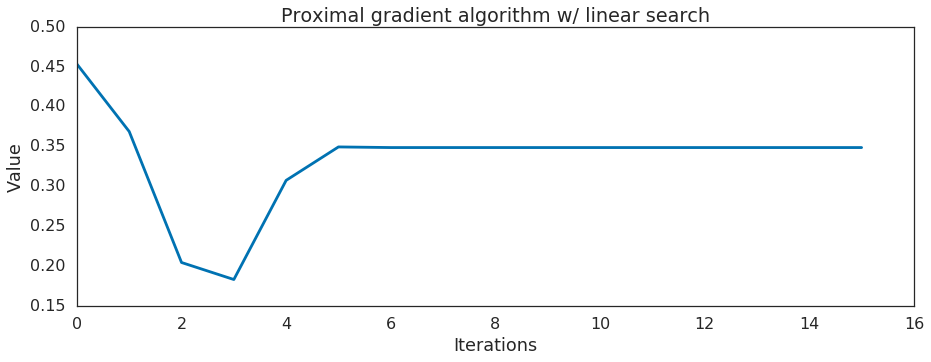

In [12]:
plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))
plt.title('Proximal gradient algorithm w/ linear search')
plt.plot(proximal_linear_search(F2,grad2, prox,0.5*np.ones(p+1),1e-3,15)[2])
plt.xlabel("Iterations")
plt.ylabel("Value")
plt.show()

In [15]:
proximal_linear_search(F2,grad2, prox,0.5*np.ones(p+1),1e-3,15)[0]

0.69314718055994651

Le nombre d'itérations peut être un bon test d'arrêt

# 3. Comparaison

## Question 3.1

Les deux méthodes concernent des fonctions objectifs convexes. 

Pour la méthode du gradient proximal, la fonction n'a pas à être de classe $\mathscr{C}^{2}$ sur $\mathbb{R\times}\mathbb{R}^{p}$. alors que pour la méthode de Newton il est nécessaire qu'elle le soit. 

La méthode de Newton converge très rapidement si on se trouve au début dans la zone de convergence. Celle du gradient proximal est plus lente.

## Question 3.2

Deux domaines de comparaison sont notables: 

• L'efficacité computationnelle : La norme $L_{2}$ est plus efficace face à des vecteurs non-sparses

• Résultats : Les solutions retournées par $L_{1}$ sont plus sparses